In [2]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input



In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten, Reshape, LeakyReLU, BatchNormalization, Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt

# Discriminator Model
def build_discriminator(img_shape):
    model = Sequential()
    model.add(Flatten(input_shape=img_shape))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Generator Model
def build_generator(z_dim):
    model = Sequential()
    model.add(Dense(256, input_dim=z_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(np.prod(img_shape), activation='tanh'))
    model.add(Reshape(img_shape))
    return model

# Saving Generated Images for Inspection
def save_imgs(generator, epoch, n_examples=10, dim=(1, 10), figsize=(10, 1)):
    noise = np.random.normal(0, 1, (n_examples, z_dim))
    gen_imgs = generator.predict(noise)
    gen_imgs = 0.5 * gen_imgs + 0.5

    plt.figure(figsize=figsize)
    for i in range(gen_imgs.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(gen_imgs[i, :, :, 0], cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig(f"mnist_{epoch}.png")
    plt.close()

# Training the GAN
def train(generator, discriminator, combined, epochs, batch_size=128, save_interval=50):
    (X_train, _), (_, _) = mnist.load_data()
    X_train = X_train / 127.5 - 1.0
    X_train = np.expand_dims(X_train, axis=3)

    valid = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for epoch in range(epochs):
        # Training Discriminator
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]
        noise = np.random.normal(0, 1, (batch_size, z_dim))
        gen_imgs = generator.predict(noise)

        d_loss_real = discriminator.train_on_batch(imgs, valid)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Training Generator
        noise = np.random.normal(0, 1, (batch_size, z_dim))
        g_loss = combined.train_on_batch(noise, valid)

        # Progress
        if epoch % save_interval == 0:
            print(f"{epoch} [D loss: {d_loss[0]}, acc.: {100*d_loss[1]}] [G loss: {g_loss}]")
            save_imgs(generator, epoch)

# Model Configuration
img_shape = (28, 28, 1)
z_dim = 100

discriminator = build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])

generator = build_generator(z_dim)
z = Input(shape=(z_dim,))
img = generator(z)

discriminator.trainable = False
valid = discriminator(img)

combined = Model(z, valid)
combined.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

# Training
train(generator, discriminator, combined, epochs=200000, batch_size=32, save_interval=100)


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 29ms/step
115400 [D loss: 0.5505708456039429, acc.: 75.0] [G loss: 1.2084959745407104]
1/1 [==============================] - 0s 43ms/step
115500 [D loss: 0.5364875793457031, acc.: 70.3125] [G loss: 0.9906148910522461]
1/1 [==============================] - 0s 64ms/step
115600 [D loss: 0.5063904076814651, acc.: 65.625] [G loss: 1.23243248462677]
1/1 [==============================] - 0s 16ms/step
115700 [D loss: 0.6459258496761322, acc.: 60.9375] [G loss: 1.2949821949005127]
1/1 [==============================] - 0s 18ms/step
115800 [D loss: 0.5775310695171356, acc.: 70.3125] [G loss: 1.0510884523391724]
1/1 [==============================] - 0s 16ms/step
115900 [D loss: 0.4993897080421448, acc.: 78.125] [G loss: 1.351051926612854]
1/1 [==============================] - 0s 16ms/step
116000 [D loss: 0.5503292083740234, acc.: 67.1875] [G loss: 1.3444116115570068]
1/1 [============================

1/1 [==============================] - 0s 20ms/step


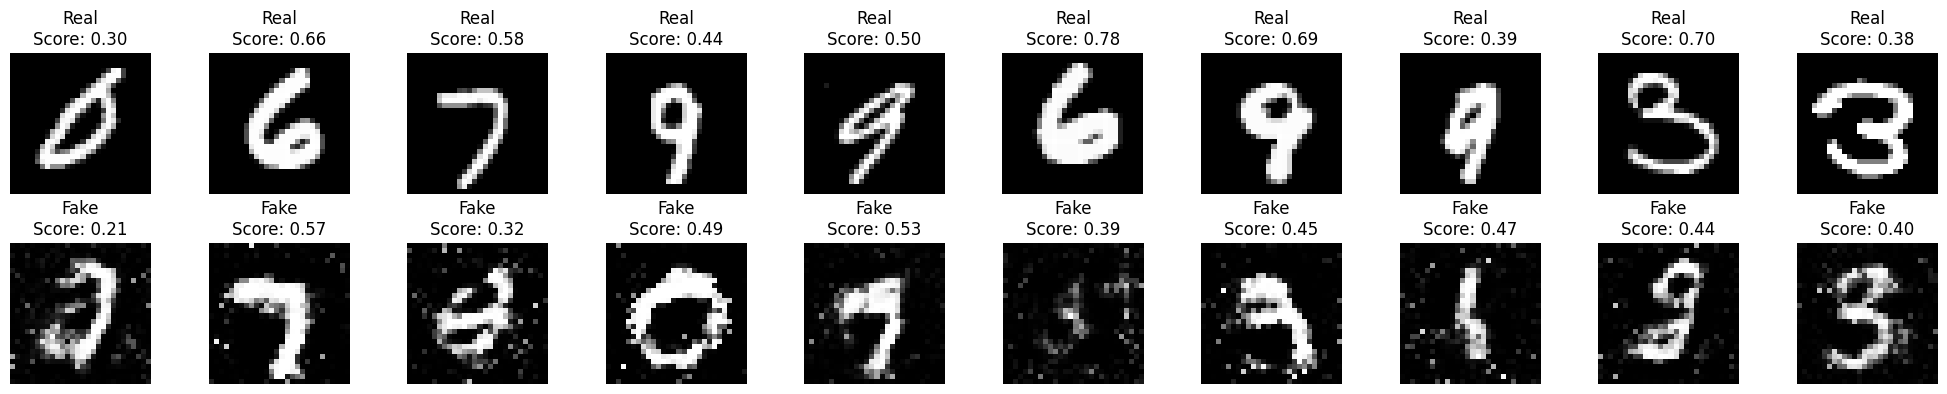

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Assuming 'generator' and 'discriminator' are your trained model instances available in the current scope

def compare_real_and_generated_images(generator, discriminator, data, n_examples=10):
    noise = np.random.normal(0, 1, (n_examples, 100))  # Adjust noise dimension if necessary
    gen_imgs = generator.predict(noise)

    idx = np.random.randint(0, data.shape[0], n_examples)
    real_imgs = data[idx]

    real_preds = discriminator.predict(real_imgs)
    fake_preds = discriminator.predict(gen_imgs)

    real_imgs = 0.5 * real_imgs + 0.5
    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(2, n_examples, figsize=(20, 4))
    for i in range(n_examples):
        axs[0, i].imshow(real_imgs[i, :, :, 0], cmap='gray')
        axs[0, i].axis('off')
        axs[0, i].set_title(f"Real\nScore: {real_preds[i][0]:.2f}")
        axs[1, i].imshow(gen_imgs[i, :, :, 0], cmap='gray')
        axs[1, i].axis('off')
        axs[1, i].set_title(f"Fake\nScore: {fake_preds[i][0]:.2f}")
    plt.tight_layout()
    plt.show()

# Load MNIST data
(X_train, _), (_, _) = mnist.load_data()
X_train = (X_train.astype(np.float32) - 127.5) / 127.5
X_train = np.expand_dims(X_train, axis=-1)

# Display comparison
compare_real_and_generated_images(generator, discriminator, X_train, 10)


In [12]:
def train_gan(generator, discriminator, combined, data, epochs, batch_size):
    valid = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    d_losses = []
    g_losses = []

    for epoch in range(epochs):
        # ---------------------
        #  Train Discriminator
        # ---------------------
        idx = np.random.randint(0, data.shape[0], batch_size)
        imgs = data[idx]
        noise = np.random.normal(0, 1, (batch_size, 100))  # Adjust noise dim if necessary
        gen_imgs = generator.predict(noise)

        d_loss_real = discriminator.train_on_batch(imgs, valid)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # ---------------------
        #  Train Generator
        # ---------------------
        noise = np.random.normal(0, 1, (batch_size, 100))  # Adjust noise dim if necessary
        g_loss = combined.train_on_batch(noise, valid)

        d_losses.append(d_loss)
        g_losses.append(g_loss)

        if epoch % 100 == 0:
            print(f"{epoch} [D loss: {d_loss[0]}, acc.: {100*d_loss[1]}] [G loss: {g_loss}]")

    return d_losses, g_losses


1/1 [==============================] - 0s 17ms/step
0 [D loss: 0.7119706273078918, acc.: 59.375] [G loss: 1.0371968746185303]
1/1 [==============================] - 0s 15ms/step


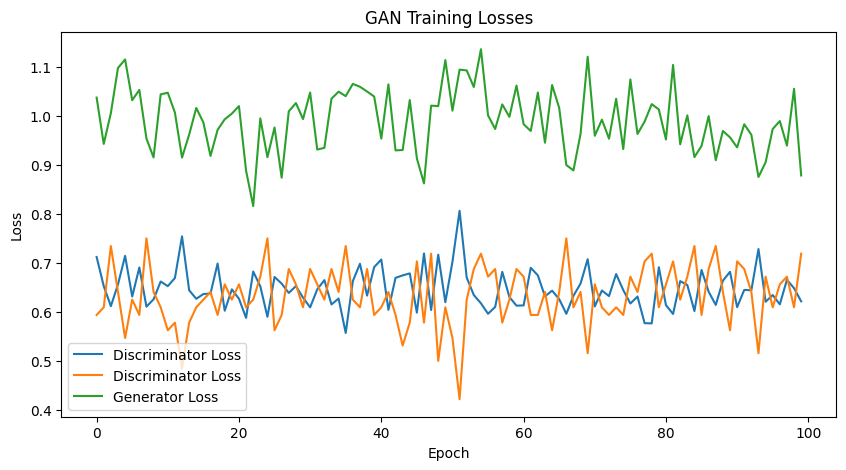

In [13]:
import matplotlib.pyplot as plt

# Assuming you have your models defined and MNIST data loaded in `X_train`
d_losses, g_losses = train_gan(generator, discriminator, combined, X_train, epochs=1000000, batch_size=32)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(d_losses, label="Discriminator Loss")
plt.plot(g_losses, label="Generator Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("GAN Training Losses")
plt.legend()
plt.show()


In [14]:
def train(generator, discriminator, combined, epochs, batch_size=128, save_interval=50):
    (X_train, _), (_, _) = mnist.load_data()
    X_train = X_train / 127.5 - 1.0  # Normalize the images to [-1, 1]
    X_train = np.expand_dims(X_train, axis=3)

    valid = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    d_losses = []
    g_losses = []

    for epoch in range(epochs):
        # ---------------------
        #  Train Discriminator
        # ---------------------
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]
        noise = np.random.normal(0, 1, (batch_size, z_dim))
        gen_imgs = generator.predict(noise)

        d_loss_real = discriminator.train_on_batch(imgs, valid)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # ---------------------
        #  Train Generator
        # ---------------------
        noise = np.random.normal(0, 1, (batch_size, z_dim))
        g_loss = combined.train_on_batch(noise, valid)

        # Record the losses
        d_losses.append(d_loss[0])  # Corrected to capture the scalar loss value
        g_losses.append(g_loss)

        # Print the progress and save images at 'save_interval' epochs
        if epoch % save_interval == 0:
            print(f"{epoch} [D loss: {d_loss[0]}, acc.: {100*d_loss[1]}] [G loss: {g_loss}]")
            save_imgs(generator, epoch, n_examples=10)  # Make sure this matches your function signature

    return d_losses, g_losses


In [15]:
def train(generator, discriminator, combined, epochs, batch_size=128, save_interval=50):
    (X_train, _), (_, _) = mnist.load_data()
    X_train = X_train / 127.5 - 1.0
    X_train = np.expand_dims(X_train, axis=3)

    valid = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    d_losses = []
    g_losses = []

    for epoch in range(epochs):
        # [Training process unchanged, see original code]

        # Record losses
        d_losses.append(d_loss[0])
        g_losses.append(g_loss)

        # Progress printing and image saving [unchanged, see original code]

    return d_losses, g_losses


1/1 [==============================] - 0s 27ms/step
0 [D loss: 0.6781985461711884, acc.: 62.5] [G loss: 1.1108832359313965]
1/1 [==============================] - 0s 28ms/step
10 [D loss: 0.5813101828098297, acc.: 71.875] [G loss: 0.9459515810012817]
1/1 [==============================] - 0s 42ms/step
20 [D loss: 0.6108193695545197, acc.: 65.625] [G loss: 1.124605655670166]
1/1 [==============================] - 0s 27ms/step
30 [D loss: 0.6123958230018616, acc.: 67.1875] [G loss: 0.983704686164856]
1/1 [==============================] - 0s 30ms/step
40 [D loss: 0.5983202457427979, acc.: 62.5] [G loss: 1.016526699066162]
1/1 [==============================] - 0s 32ms/step
50 [D loss: 0.5439378023147583, acc.: 73.4375] [G loss: 1.036699891090393]
1/1 [==============================] - 0s 27ms/step
60 [D loss: 0.6009306311607361, acc.: 71.875] [G loss: 0.8225136995315552]
1/1 [==============================] - 0s 59ms/step
70 [D loss: 0.6894646286964417, acc.: 54.6875] [G loss: 0.95206731

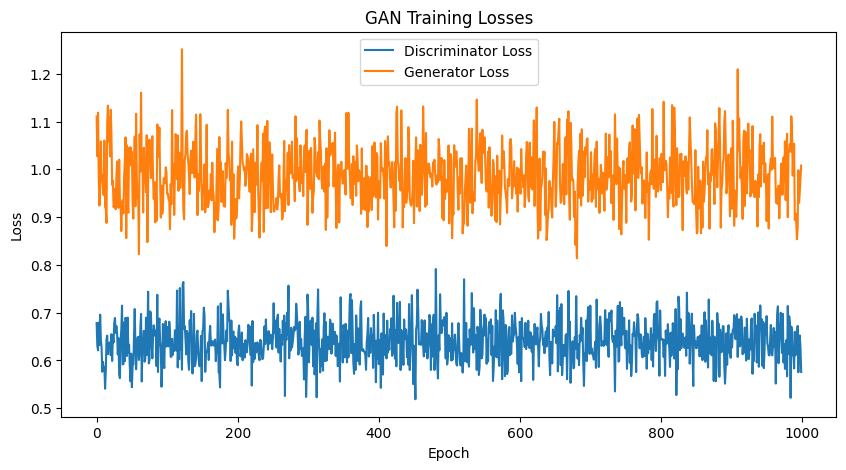

In [ ]:
# Adjust the epochs and batch_size if needed
d_losses, g_losses = train(generator, discriminator, combined, epochs=1000, batch_size=32, save_interval=10)

# Plot losses
plt.figure(figsize=(10, 5))
plt.plot(d_losses, label="Discriminator Loss")
plt.plot(g_losses, label="Generator Loss")
plt.title("GAN Training Losses")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


1/1 [==============================] - 0s 43ms/step


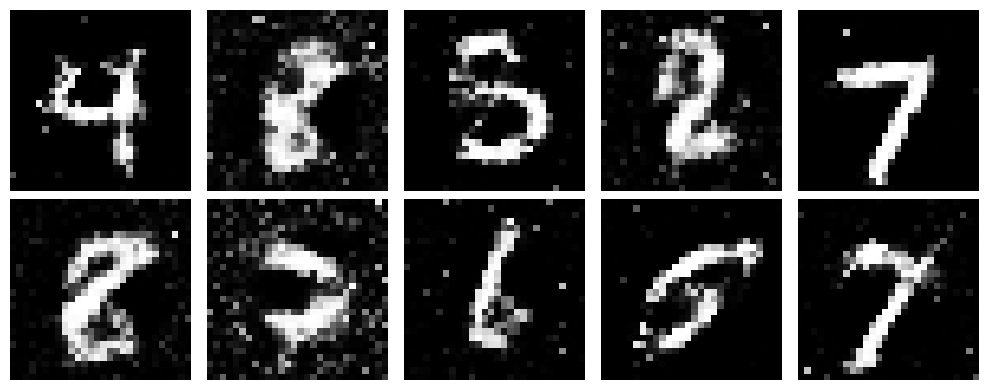

In [17]:
def display_generated_images(generator, n=10):
    noise = np.random.normal(0, 1, (n, z_dim))
    gen_imgs = generator.predict(noise)
    gen_imgs = 0.5 * gen_imgs + 0.5  # Rescale images 0 - 1

    plt.figure(figsize=(10, 4))
    for i in range(n):
        plt.subplot(2, n//2, i+1)
        plt.imshow(gen_imgs[i, :, :, 0], cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

display_generated_images(generator)


In [18]:
def compare_statistics(generator, real_images, n=1000):
    noise = np.random.normal(0, 1, (n, z_dim))
    gen_imgs = generator.predict(noise)
    gen_imgs_rescaled = 0.5 * gen_imgs + 0.5  # Rescale generated images 0 - 1

    # Calculate statistics for generated images
    gen_mean = np.mean(gen_imgs_rescaled)
    gen_std = np.std(gen_imgs_rescaled)

    # Calculate statistics for real images
    real_mean = np.mean(real_images)
    real_std = np.std(real_images)

    print(f"Generated Images - Mean: {gen_mean:.4f}, Std: {gen_std:.4f}")
    print(f"Real Images - Mean: {real_mean:.4f}, Std: {real_std:.4f}")

# Assuming real_images is your dataset loaded and normalized to [0, 1] range
(X_train, _), (_, _) = mnist.load_data()
X_train = X_train / 255.0  # Normalize real images to [0, 1]

compare_statistics(generator, X_train)


32/32 [==============================] - 0s 2ms/step
Generated Images - Mean: 0.1421, Std: 0.3030
Real Images - Mean: 0.1307, Std: 0.3081


32/32 [==============================] - 0s 1ms/step


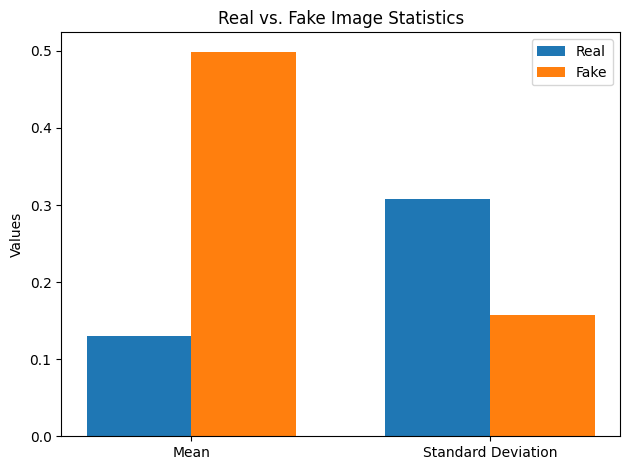

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, LeakyReLU, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

# Placeholder function for the generator model (assume it's already trained)
def build_generator():
    model = Sequential()
    # This is a simplified generator structure
    model.add(Dense(128, activation="relu", input_dim=100))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Dense(784, activation="tanh"))
    model.add(Reshape((28, 28, 1)))
    return model

# Load and preprocess real images from MNIST
def load_real_images():
    (X_train, _), (_, _) = mnist.load_data()
    X_train = X_train / 127.5 - 1.0  # Normalize to [-1, 1]
    X_train = np.expand_dims(X_train, axis=-1)
    return X_train

# Generate fake images with the generator
def generate_fake_images(generator, num_images):
    noise = np.random.normal(0, 1, (num_images, 100))
    fake_images = generator.predict(noise)
    return fake_images

# Plot statistics comparison
def plot_statistics(real_images, fake_images):
    real_mean, real_std = np.mean(real_images), np.std(real_images)
    fake_mean, fake_std = np.mean(fake_images), np.std(fake_images)

    labels = ['Mean', 'Standard Deviation']
    real_stats = [real_mean, real_std]
    fake_stats = [fake_mean, fake_std]

    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, real_stats, width, label='Real')
    rects2 = ax.bar(x + width/2, fake_stats, width, label='Fake')

    ax.set_ylabel('Values')
    ax.set_title('Real vs. Fake Image Statistics')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()
    plt.show()

# Assuming the generator model is defined and trained
generator = build_generator()  # Placeholder for an actual trained model
real_images = load_real_images()
fake_images = generate_fake_images(generator, 1000)  # Generate 1000 fake images for comparison

# Normalize fake images from [-1, 1] to [0, 1] for a fair comparison
fake_images = (fake_images + 1) / 2.0
real_images = (real_images + 1) / 2.0

plot_statistics(real_images, fake_images)
